### Árboles de desición

In [47]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
sns.set()

In [48]:
ti_train = pd.read_csv('./db/titanic-train.csv')
ti_test = pd.read_csv('./db/titanic-test.csv')
ti_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Importancia de datos no nulos

In [49]:
ti_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


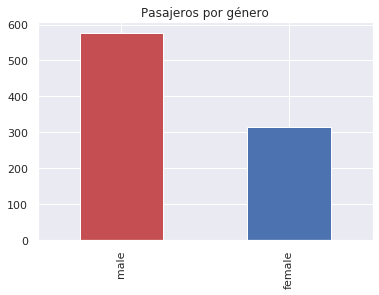

In [50]:
ti_train['Sex'].value_counts().plot(kind='bar', color=['r', 'b'])
plt.title('Pasajeros por género')
plt.show()


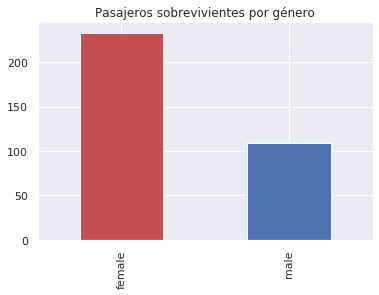

In [51]:
ti_train[ti_train['Survived']==1]['Sex'].value_counts().plot(kind='bar', color=['r', 'b'])
plt.title('Pasajeros sobrevivientes por género')
plt.show()

**Cleaning Data**

Convertir una variable categorica en tipo numerico, en el caso de genero se cambia 1: male y 0: female -> Encoding

In [57]:
ti_train['Sex'].dtype

dtype('O')

In [23]:
label_encoder = preprocessing.LabelEncoder()
encoder_Sex = label_encoder.fit_transform(ti_train['Sex'])
ti_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reemplazar datos nulos por la mediana (edad), embarque (S-Ciudad de embbarque con mas pasajeros)

In [24]:
ti_train['Age'] = ti_train['Age'].fillna(ti_train['Age'].median())
ti_train['Embarked'] = ti_train['Embarked'].fillna('S')

Retirar las columnas del dataset que no se van a utilizar, quedan las columnas que SI van a usarse para el entrenamiento

In [31]:
train_predictors = ti_train.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


Obtener los datos de tipo categorico

Lista que selecciona las columnas con variables object que no tengan más de 10 valroes diferentes

In [30]:
categorical_cols = [cname for cname in train_predictors.columns if
                        train_predictors[cname].nunique() < 10 and
                        train_predictors[cname].dtype == 'object']
categorical_cols                   

['Sex', 'Embarked']

Obtener los datos de tipo numerico

In [32]:
numerical_cols = [cname for cname in train_predictors.columns if
                   train_predictors[cname].dtype in ['int64', 'float64']]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Organizar información del dataset

In [35]:
my_cols = categorical_cols + numerical_cols
train_predictors = train_predictors[my_cols]
train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000
887,female,S,1,19.0,0,0,30.0000
888,female,S,3,28.0,1,2,23.4500
889,male,C,1,26.0,0,0,30.0000


Dummy encoded le da valores numericos a la varaibles categoricas

In [59]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [38]:
ti_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

La predicción corresponde al dato de superviviencia, por ende se usa para supervisar el entrenamiento

In [61]:
y_target = ti_train['Survived'].values


Se obtiene la matriz de los val;ores para entrenamiento (features)

In [60]:
x_features_one = dummy_encoded_train_predictors.values

Separar datos de entrenamiento y prueba

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_features_one, y_target, test_size = .20, random_state = 0)

Entrenar el modelo basado en arboles de desición

In [86]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

Score del clasificador

In [87]:
tree_one_accuracy = round(tree_one.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.7821


In [88]:
from io import StringIO 
from IPython.display import Image, display
import pydotplus
import PIL

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())

graph.write_png('./imagenes/titanic.png')


True

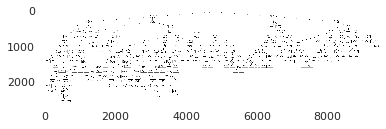

In [89]:
from PIL import Image
im = Image.open('./imagenes/titanic.png')
plt.imshow(im)